In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [111]:
import h5py    
hf = h5py.File('SVHN_single_grey1.h5')
hf.keys()
x_test=np.array(hf['X_test'])
x_train=np.array(hf['X_train'])
y_test=np.array(hf['y_test'])
y_train=np.array(hf['y_train'])

<ipython-input-111-cd8848d4831d>:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hf = h5py.File('SVHN_single_grey1.h5')


In [112]:
x_train.shape

(42000, 32, 32)

In [113]:
x_test.shape

(18000, 32, 32)

In [114]:
x_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

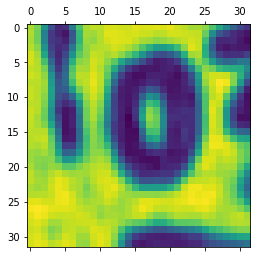

In [115]:
plt.matshow(x_train[5])

In [116]:
y_train[2]

7

In [117]:
X_train=x_train/255
X_test=x_test/255

In [118]:
X_train[0]

array([[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 , 0.2283153 ,
        0.16860352],
       [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 , 0.40534863,
        0.33056822],
       [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473, 0.47754902,
        0.45263842],
       ...,
       [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059, 0.09840274,
        0.10219726],
       [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294, 0.11556196,
        0.11790627],
       [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727, 0.19942354,
        0.20799099]], dtype=float32)

In [119]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten

In [120]:
model=Sequential()

In [121]:
model.add(Flatten(input_shape=[32,32]))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(200,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 200)               205000    
                                                                 
 dense_29 (Dense)            (None, 200)               40200     
                                                                 
 dense_30 (Dense)            (None, 200)               40200     
                                                                 
 dense_31 (Dense)            (None, 10)                2010      
                                                                 
Total params: 287,410
Trainable params: 287,410
Non-trainable params: 0
_________________________________________________________________


In [123]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics="accuracy")

In [124]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3210 - accuracy: 0.0991
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3107 - accuracy: 0.0999
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3072 - accuracy: 0.1011
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3075 - accuracy: 0.0973
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3055 - accuracy: 0.1015
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3058 - accuracy: 0.0989
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3063 - accuracy: 0.0966
Epoch 8/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3061 - accuracy: 0.0987
Epoch 9/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.3059 - accuracy: 0.0998
Epoch 10/10
1313/1313 [==============================] - 4s 3ms/step - loss: 2.306

In [125]:
y_predict=model.predict(X_test)

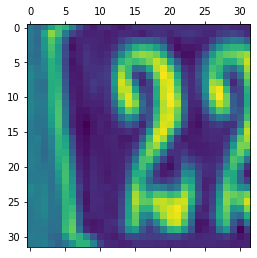

In [126]:
plt.matshow(X_test[214])

In [127]:
y_predict[214]

array([0.10941333, 0.10474272, 0.09138103, 0.08252046, 0.10013014,
       0.10411491, 0.10129278, 0.09711422, 0.11610995, 0.09318047],
      dtype=float32)

In [128]:
np.argmax(y_predict[214])

8

In [129]:
model.evaluate(X_test,y_test)

563/563 [==============================] - 1s 2ms/step - loss: 2.3058 - accuracy: 0.1007


[2.305772066116333, 0.10066666454076767]

In [130]:
label_for_first_test_image=np.argmax(y_predict[0])
print(label_for_first_test_image)

8


In [131]:
y_predict_labels=[np.argmax(1) for i in y_predict]
print(y_predict_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [132]:
from sklearn.metrics import confusion_matrix

Text(0.5, 42.0, 'predicted labels')

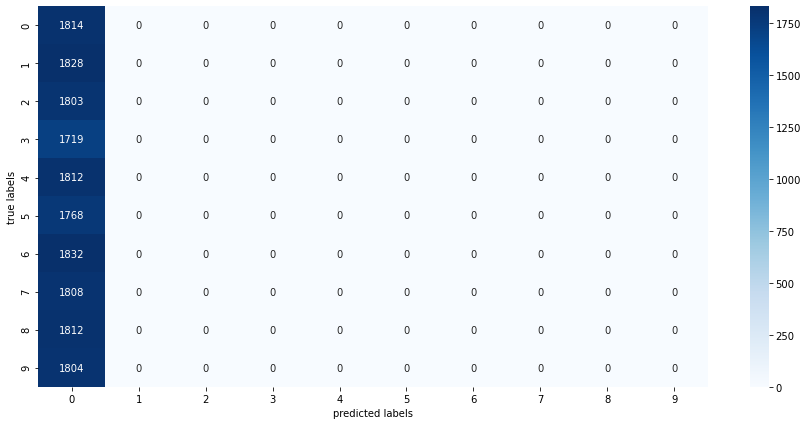

In [133]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('true labels')
plt.xlabel('predicted labels')

In [134]:
conf_mat=confusion_matrix(y_test,y_predict_labels)
print(conf_mat)

[[1814    0    0    0    0    0    0    0    0    0]
 [1828    0    0    0    0    0    0    0    0    0]
 [1803    0    0    0    0    0    0    0    0    0]
 [1719    0    0    0    0    0    0    0    0    0]
 [1812    0    0    0    0    0    0    0    0    0]
 [1768    0    0    0    0    0    0    0    0    0]
 [1832    0    0    0    0    0    0    0    0    0]
 [1808    0    0    0    0    0    0    0    0    0]
 [1812    0    0    0    0    0    0    0    0    0]
 [1804    0    0    0    0    0    0    0    0    0]]
